In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# replace ffl with the appropriate filename in your computer

ffl = "/home/alamj/awcm++/post_process/data/xnaca/csvs/xcyl2d.csv"
u = np.loadtxt(ffl,delimiter=",")
nx = 768
nz = 192
x = np.linspace(0,32,nx)
z = np.linspace(0,8,nz)
U = u[:,400:601]


array([[1.        , 0.04574592],
       [0.04574592, 1.        ]])

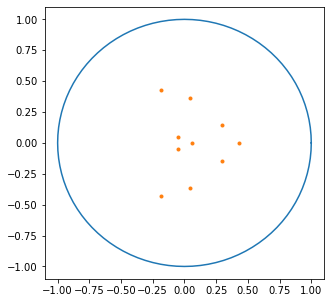

In [5]:
# Dynamic mode decomposition of a random matrix U
np.random.seed(123456789)
U = np.random.randn(100,40)

# Regression U2 = A*U1
U1 = U[:,:-1]
U2 =U[:,1:]
# POD
Phi,Sig,PsiT = np.linalg.svd(U1,full_matrices=0)

r =10
rPhi = Phi[:,:r]
rSig = Sig[:r]
rPsiT = PsiT[:r,:]

# projected data

rU = np.dot(rPhi*rSig, rPsiT)

#plt.plot(U[:,0],rU[:,0],'.')
#np.corrcoef(U[:,0],rU[:,0])

Energy = Sig**2/np.sum(Sig**2)
#plt.plot(Energy)
#plt.plot(np.cumsum(Energy))

# DMD mode
# regression equation U2 = A*U1

A = np.linalg.multi_dot([rPhi.T, U2, rPsiT.T/rSig])  #Atilde

Omega, R = np.linalg.eig(A)

# computing dynamic modes

D = np.linalg.multi_dot([U2, rPsiT.T/rSig, R])

pD = np.dot(rPhi,R)

idx = Omega.argsort()[::-1]
idx[:10]
#pD[:,idx[0]] # strongest DMD modes

theta = np.linspace(0,2*np.pi,101)
circ = np.array([np.cos(theta),np.sin(theta)])
plt.figure(figsize=(5,5))

plt.plot(circ[0,:],circ[1,:])
plt.plot(Omega.real,Omega.imag,'.')

# DMD reconstruction
u0 = U[:,0]
b = np.linalg.lstsq(pD,u0,rcond=None)[0] # pD*b = u0

dt = 0.125
omega = np.log(Omega)/dt

m =20
t = m*dt
V = np.dot(pD, b*np.exp(omega*t)).real
np.corrcoef(V,U[:,m])